# Stroke Prediction

## Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Models libraries
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, precision_recall_curve, auc,plot_confusion_matrix


## Importing Dataset

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# EDA

## Box Plot

<function matplotlib.pyplot.show(close=None, block=None)>

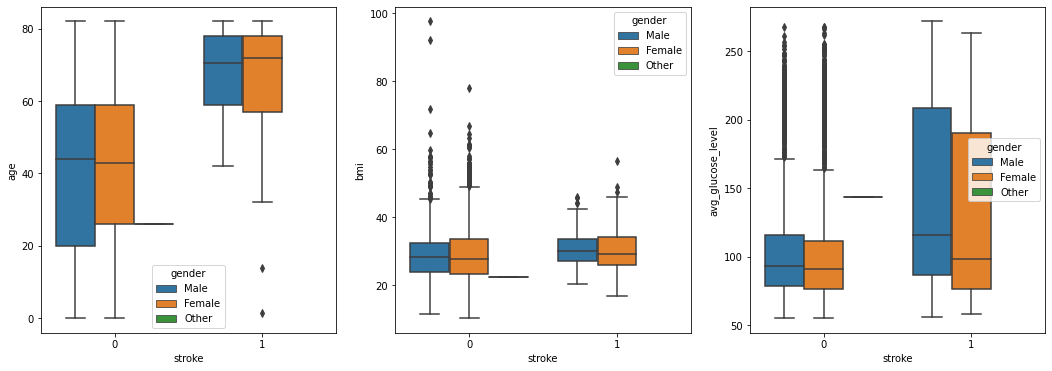

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6) , squeeze=True)

sns.boxplot(data=dataset,y='age',x='stroke',palette='tab10', hue='gender', ax=axes[0])
sns.boxplot(data=dataset,y='bmi',x='stroke',palette='tab10',hue='gender', ax=axes[1])
sns.boxplot(data=dataset,y='avg_glucose_level',x='stroke',palette='tab10',hue='gender', ax=axes[2])

plt.show

From the Abobe graph
- For older age in both Male and Female, there is high chance of brain stroke.

## CountPlot

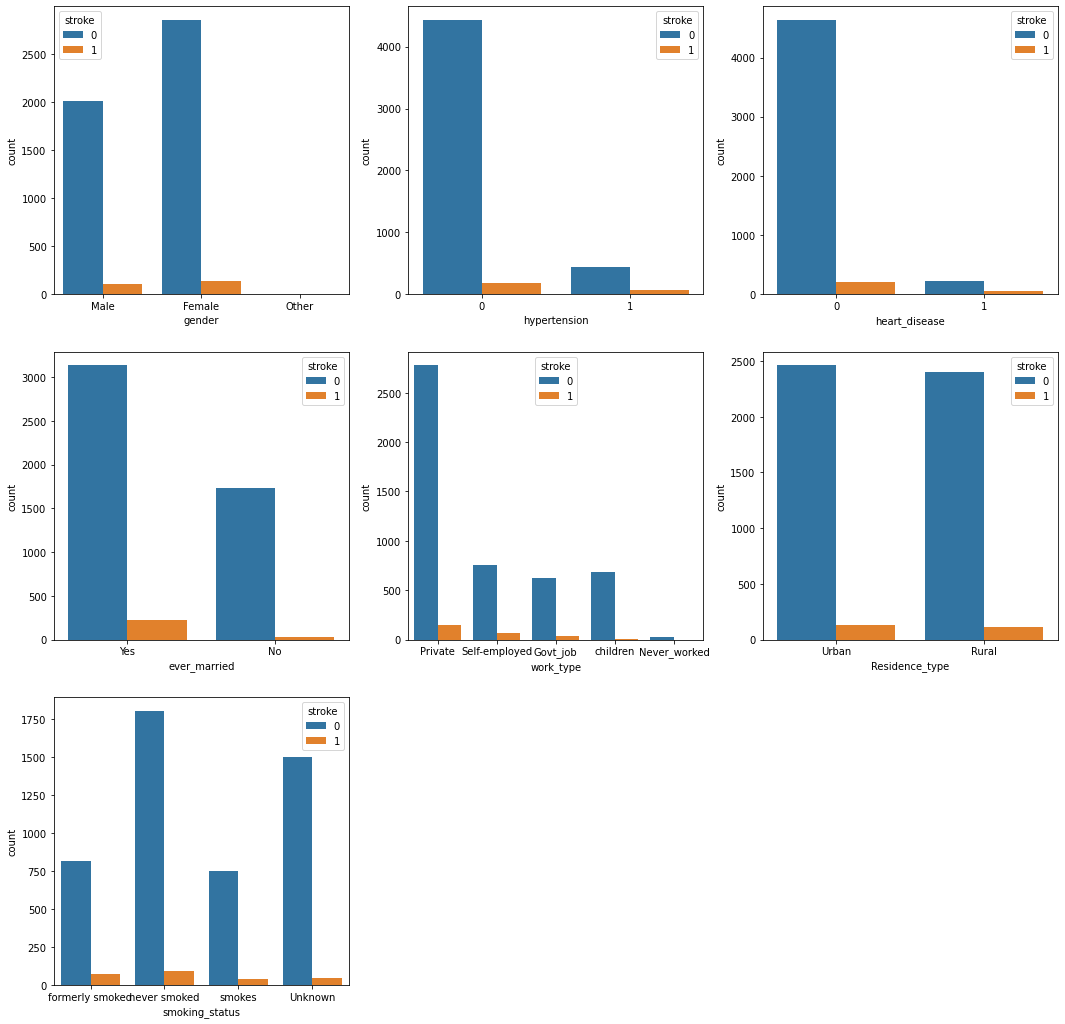

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))
fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])
sns.countplot(x="gender", hue='stroke', palette='tab10', data=dataset , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', palette="tab10", data=dataset, ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', palette="tab10", data=dataset, ax=axes[0,2])

sns.countplot(x="ever_married", hue='stroke', palette="tab10", data=dataset, ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', palette="tab10", data=dataset , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', palette="tab10", data=dataset , ax=axes[1,2])

sns.countplot(x="smoking_status", hue='stroke', palette="tab10", data=dataset , ax=axes[2,0])

plt.show()


## Correlation between parameters

<AxesSubplot:>

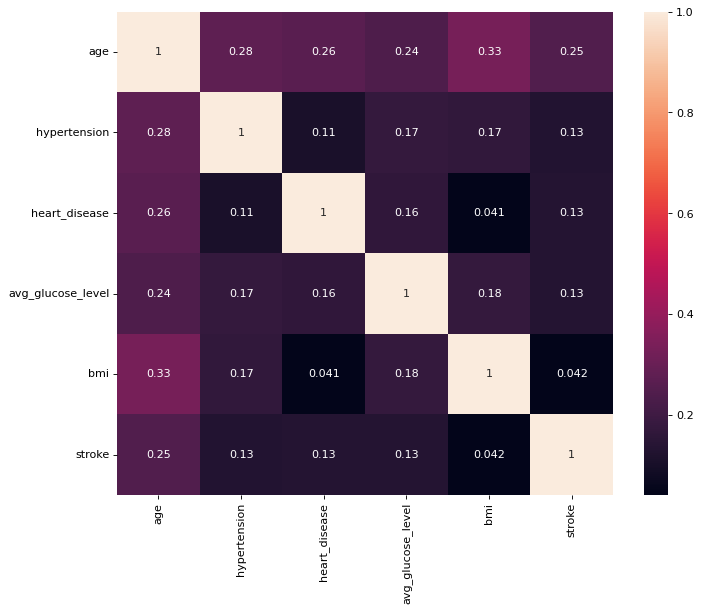

In [7]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(data=dataset.drop(['id'], axis=1).corr(),cmap='rocket',cbar=True,robust=False,annot=True)

Stroke is strongly correlated with Age. In older age persons, there is highly chance of stroke.

## Outliers

<AxesSubplot:ylabel='bmi'>

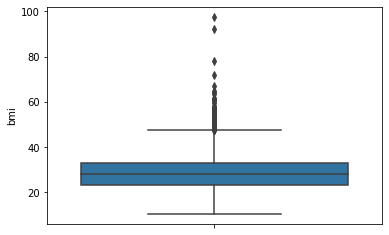

In [8]:
# Displying the outliers
sns.boxplot(data=dataset,y='bmi',palette='tab10')

Since there is very less people whose BMI index is more than 70. So it is better to remove.

In [9]:
# cutting the outliers
display(dataset[dataset['bmi'] > 70])

dataset.drop(dataset.index[dataset['bmi'] > 70], inplace=True)

dataset = dataset.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


<AxesSubplot:ylabel='bmi'>

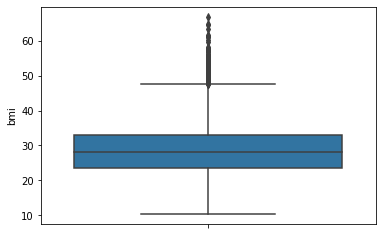

In [10]:
sns.boxplot(data=dataset,y='bmi',palette='tab10')
#checking outlier after removing

## Droping ID

In [11]:
dataset= dataset.drop('id', axis=1)

In [12]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Identifying Null dataset

In [13]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
check_null= [col for col in dataset.columns if dataset[col].isnull().any()]
check_null

['bmi']

Olny BMI contains 201 null dataset
 

## Taking care of missing data

In [15]:
# Using mean of Bmi
dataset["bmi"] = dataset["bmi"].fillna(dataset["bmi"].mean())
print(dataset.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [16]:
# fitting the dataset in X & Y variables. 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
X

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.847584097859333,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

# Encoding Categorial data

## 1. Label Encoding

In [18]:
#checking unique data in each column
print(dataset['gender'].unique())
print(dataset['ever_married'].unique())
print(dataset['work_type'].unique())
print(dataset['Residence_type'].unique())
print(dataset['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [19]:
#encoding String data into integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
#X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
#X[:,6] = le.fit_transform(X[:,6])
X[:,9] = le.fit_transform(X[:,9])

## 2.One-hot encondeing

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(),[4])], remainder = 'passthrough')
ct = ColumnTransformer([('encoder', OneHotEncoder(), [4,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [21]:
print(X)

[[0.0 1.0 0.0 ... 228.69 36.6 1]
 [0.0 1.0 1.0 ... 202.21 28.847584097859333 2]
 [0.0 1.0 1.0 ... 105.92 32.5 2]
 ...
 [0.0 1.0 1.0 ... 82.99 30.6 2]
 [0.0 1.0 1.0 ... 166.29 25.6 1]
 [0.0 1.0 0.0 ... 85.28 26.2 0]]


## Splitting The dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Classification model on the Training set

In [51]:
#applying model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#predicting results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print("Accuracy score: "+ str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
Accuracy score: 0.9432485322896281
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       967
           1       0.20      0.02      0.03        55

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.1145247720221867

# Balancing The dataset

[Text(0.5, 1.0, 'Unbalanced dataset')]

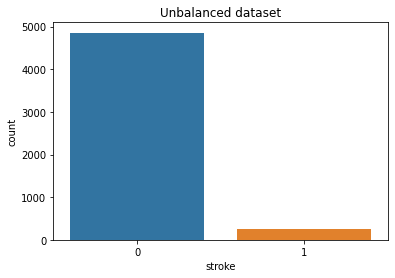

In [24]:
#checking dataset is balancedor not
sns.countplot(x='stroke', data=dataset).set(title='Unbalanced dataset')

## 1. Undersampling the data

In [25]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 4857, 1: 249})


In [26]:
#Undersampling data using Random Under Sampler
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)

In [27]:
counter = Counter(y_under)
print(counter)

Counter({0: 249, 1: 249})


[Text(0.5, 1.0, 'Under Sampling')]

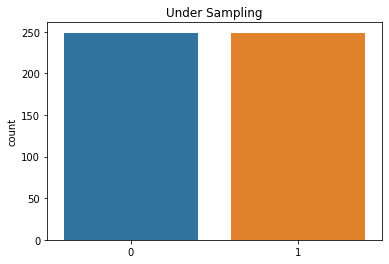

In [28]:
#checking dataset is balancedor not
sns.countplot(x=y_under, data=dataset).set(title='Under Sampling')

## Classification Method

In [29]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 0)

In [30]:
#Classification using Random Forest Classifier
classifier_under = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_under.fit(X_train_under, y_train_under)

y_pred_under = classifier_under.predict(X_test)
print(np.concatenate((y_pred_under.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

cm_under = confusion_matrix(y_test, y_pred_under)
print("Confusion matrix: \n"+str(cm_under))
print("Accuracy: " + str(accuracy_score(y_test, y_pred_under)))

print(classification_report(y_test, y_pred_under))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]
Confusion matrix: 
[[725 242]
 [  3  52]]
Accuracy: 0.7602739726027398
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       967
           1       0.18      0.95      0.30        55

    accuracy                           0.76      1022
   macro avg       0.59      0.85      0.58      1022
weighted avg       0.95      0.76      0.83      1022



In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_under)

-3.7079063645764787

# 2.Oversampling 

In [31]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 4857, 1: 249})


In [32]:
# SMOT Method
# Transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
sample = SMOTE()
X_over, y_over = sample.fit_resample(X, y)

In [33]:
counter = Counter(y_over)
print(counter)

Counter({1: 4857, 0: 4857})


[Text(0.5, 1.0, 'After Oversampling')]

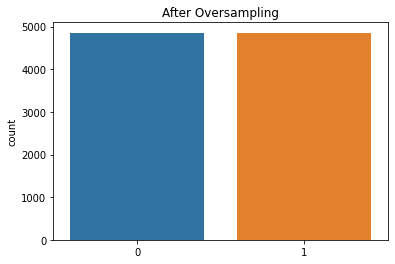

In [34]:
#checking dataset is balancedor not
sns.countplot(x=y_over, data=dataset).set(title='After Oversampling')

# Classification methods

In [35]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier_over = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_over.fit(X_train_over, y_train_over)

y_pred_over = classifier_over.predict(X_test)
print(np.concatenate((y_pred_over.reshape(len(y_pred_over),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm_over = confusion_matrix(y_test, y_pred_over)
print("Confusion matrix: \n"+str(cm_over))
print("Accuracy: " + str(accuracy_score(y_test, y_pred_over)))

print(classification_report(y_test, y_pred_over))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
Confusion matrix: 
[[963   4]
 [ 24  31]]
Accuracy: 0.9726027397260274
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.89      0.56      0.69        55

    accuracy                           0.97      1022
   macro avg       0.93      0.78      0.84      1022
weighted avg       0.97      0.97      0.97      1022



In [56]:
# r2 test for model fit
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_over)

0.4619535583341168

## Boosing and selecting Hyperparameters using GridSearchCV

In [37]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        } 
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors': [2,5,10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=0),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss']          
                          
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [20,50,100]
        }
    }
}

In [38]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_over, y_train_over)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
dataset_over = pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
dataset_over

C:\Users\Ajit\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ajit\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

,model,best_score,best_params
0,logistic_regression,0.771587,"{'C': 1, 'solver': 'lbfgs'}"
1,svm,0.946983,"{'C': 10, 'kernel': 'rbf'}"
2,KNN,0.914812,{'n_neighbors': 2}
3,Decision Tree,0.941578,{'criterion': 'entropy'}
4,random_forest,0.970917,{'n_estimators': 100}


Classification model apply

In [39]:
#Score visualisation
def score_vis(score1):
    names = ['Random Forest','XGBoost']

In [62]:
def trainer(X_train_over, y_train_over, X_test, y_test):
    models = [[' Random Forest ', RandomForestClassifier(n_estimators=100)],
            ['XGBoost', XGBClassifier()]             
             ]
    scores1 = []

    for model_name, model in models:
        model = model
        model.fit(X_train_over, y_train_over)
        pred_over = model.predict(X_test)
        cm_model = confusion_matrix(y_test, pred_over)
        scores1.append(accuracy_score(y_test, model.predict(X_test)))

        print(model_name)
        print(cm_model)
        print("Train Accuracy_score: " + str(round(accuracy_score(y_train_over, model.predict(X_train_over)) * 100, 2)) + '%')
        print("Test Accuracy_score:  "+ str(round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)) + '%\n' )
        print(classification_report(y_test, pred_over))
    return scores1


In [63]:
scores1 = trainer(X_train_over, y_train_over, X_test, y_test)

 Random Forest 
[[966   1]
 [ 20  35]]
Train Accuracy_score: 100.0%
Test Accuracy_score:  97.95%

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.97      0.64      0.77        55

    accuracy                           0.98      1022
   macro avg       0.98      0.82      0.88      1022
weighted avg       0.98      0.98      0.98      1022

XGBoost
[[963   4]
 [ 21  34]]
Train Accuracy_score: 99.86%
Test Accuracy_score:  97.55%

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.89      0.62      0.73        55

    accuracy                           0.98      1022
   macro avg       0.94      0.81      0.86      1022
weighted avg       0.97      0.98      0.97      1022



We predicted the highest accuracy of **97.95** by **Random Forest Classifier**